<a href="https://colab.research.google.com/github/bhavanar02/UCD_ML/blob/main/Lab4Pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+----------------+---------------+-----+------------------+----------------+
| diff           | diff(easy)    | ... | diff(hard)       | diff(hard)     |
+----------------+---------------+-----+------------------+----------------+
| aptitude       | aptitude(low) | ... | aptitude(medium) | aptitude(high) |
+----------------+---------------+-----+------------------+----------------+
| grades(gradeA) | 0.1           | ... | 0.1              | 0.1            |
+----------------+---------------+-----+------------------+----------------+
| grades(gradeB) | 0.1           | ... | 0.1              | 0.1            |
+----------------+---------------+-----+------------------+----------------+
| grades(gradeC) | 0.8           | ... | 0.8              | 0.8            |
+----------------+---------------+-----+------------------+----------------+


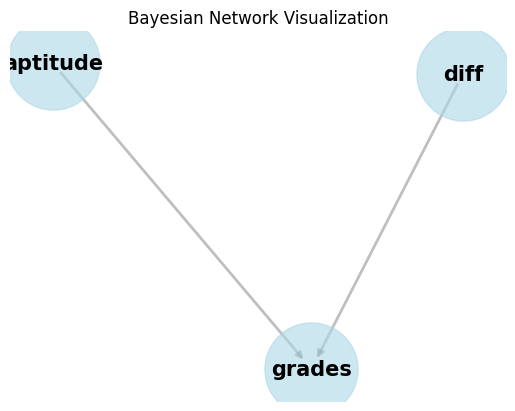

In [4]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
import networkx as nx
import pylab as plt

student = BayesianNetwork([('diff', 'grades'), ('aptitude', 'grades')])
grades_cpd = TabularCPD('grades', 3, [[0.1,0.1,0.1,0.1,0.1,0.1],
                                      [0.1,0.1,0.1,0.1,0.1,0.1],
                                      [0.8,0.8,0.8,0.8,0.8,0.8]],
                        evidence=['diff', 'aptitude'], evidence_card=[2, 3],
                        state_names={'grades': ['gradeA', 'gradeB', 'gradeC'],
                                     'diff': ['easy', 'hard'],
                                     'aptitude': ['low', 'medium', 'high']})
student.add_cpds(grades_cpd)
print(grades_cpd)


G = nx.DiGraph()
G.add_nodes_from(student.nodes())
G.add_edges_from(student.edges())
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=4500, node_color='lightblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif', font_weight='bold')
plt.title("Bayesian Network Visualization")
plt.axis('off')
plt.show()